In [81]:
from __future__ import division
import numpy as np
import scipy
from scipy import linalg as sciLA
from scipy import integrate
from numpy import linalg as LA
from scipy.sparse import spdiags
from scipy.sparse import diags
import scipy.io as sio

import matplotlib.pyplot as plt

#### Solving with Guassian or LU Decomp 

In [82]:
A = np.matrix([[1,1,1],[1,2,4],[1,3,9]])
b = np.matrix([[1],[-1],[1]])

#simple way to solve, uses Guassian Elimination, similiar to a \ in matlab
x = LA.solve(A,b)
#print x

#LU decomposition for solving
[P, L, U] = sciLA.lu(A)
y = LA.solve(L, LA.inv(P) * b)
x = LA.solve(U,y)
#print x

#### Import .mat  for HW

In [83]:
mat_contents = sio.loadmat('Fmat.mat')
Fmat = mat_contents['Fmat']
Fmat.shape

(400L, 400L)

In [84]:
mat_contents = sio.loadmat('permvec.mat')
permvec = mat_contents['permvec']
permvec.shape

(1L, 16L)

#### Iterative Methods

##### Solve with Jacobi Method

In [271]:
#given
A = np.matrix([[4,-1,1],
               [4,-8,1],
               [-2,1,5]])

b = np.matrix([[7],[-21],[15]])

#first we would want to check for strictly diagonal dominant

#create diagonal matrix
diags = np.diag(A)
D = np.diag(diags)
# create R matrix
R = A - D
R_sums = R.sum(axis=1)

#loop through and check for SDD
for i in range(0, len(diags)):
    if abs(R_sums[i]) > abs(diags[i]):
        print 'fails at index: ' + str(i)
    i = i + 1
    
    
#create other matrices needed to solve

#create strict upper matrix
Us = np.asmatrix(np.triu(A, k=1))
#create upper matrix
U = np.asmatrix(np.triu(A, k=0))
#create lower matrix
L = np.asmatrix(np.tril(A, k=0))

x0 = [1, 2, 2]
x = np.column_stack((x0,))

#set tolerance
tol = 10**-4

for i in range(0, 10):
    x1 = LA.inv(D) * (-R * x + b)
    
    if (abs(x1[0, 0]-x[0, 0]) < tol) or (abs(x1[1, 0]-x[1, 0]) < tol) or (abs(x1[2, 0]-x[2, 0]) < tol):
        print 'it took ' + str(i+1) + ' iterations to find a solution'
        break;
    
    x = x1

it took 8 iterations to find a solution


##### Solve with Gauss Seidel Method

In [273]:
#given
A = np.matrix([[4,-1,1],
               [4,-8,1],
               [-2,1,5]])

b = np.matrix([[7],[-21],[15]])

#first we would want to check for strictly diagonal dominant

#create diagonal matrix
diags = np.diag(A)
D = np.diag(diags)
# create R matrix
R = A - D
R_sums = R.sum(axis=1)

#loop through and check for SDD
for i in range(0, len(diags)):
    if abs(R_sums[i]) > abs(diags[i]):
        print 'fails at index: ' + str(i)
    i = i + 1
    
    
#create other matrices needed to solve

#create strict upper matrix
Us = np.asmatrix(np.triu(A, k=1))
#create upper matrix
U = np.asmatrix(np.triu(A, k=0))
#create lower matrix
L = np.asmatrix(np.tril(A, k=0))

x0 = [1, 2, 2]
x = np.column_stack((x0,))

#set tolerance
tol = 10**-4

for i in range(0, 100):
    x1 = np.dot(LA.inv(L) , (-Us + b) * x)
    
    if (abs(x1[0, 0]-x[0, 0]) < tol) or (abs(x1[1, 0]-x[1, 0]) < tol) or (abs(x1[2, 0]-x[2, 0]) < tol):
        print 'it took ' + str(i+1) + ' iterations to find a solution'
        break;
    
    x = x1

In [274]:
x1 = LA.inv(L) * ((-Us + b) * x)

In [277]:
import numpy as np

ITERATION_LIMIT = 10

#given
A = np.matrix([[4,-1,1],
               [4,-8,1],
               [-2,1,5]])

b = np.matrix([[7],[-21],[15]])

x = np.zeros_like(b)
for it_count in range(1, ITERATION_LIMIT):
    x_new = np.zeros_like(x)
    #print("Iteration {0}: {1}".format(it_count, x))
    for i in range(A.shape[0]):
        s1 = np.dot(A[i, :i], x_new[:i])
        s2 = np.dot(A[i, i + 1:], x[i + 1:])
        x_new[i] = (b[i] - s1 - s2) / A[i, i]
    if np.allclose(x, x_new, rtol=1e-4):
        break
    x = x_new

#print("Solution: {0}".format(x))
error = np.dot(A, x) - b
#print("Error: {0}".format(error))

In [281]:
L = 20 #define computational domain
n = 128 #define the number of fourier modes

x2 = np.linspace(-L/2, L/2, n+1) #define the domain discritization
len(x2)

129

In [284]:
x = x2[1:n] #consider only the first n points: periodic
len(x)

127

In [287]:
L = 20 #define computational domain
n = 128 #define the number of fourier modes

x2 = np.linspace(-L/2, L/2, n+1) #define the domain discritization
x = x2[0:n] #consider only the first n points: periodic

u = 1 / np.cosh(x) #function to take derivative
ut = np.fft.fft(u) #FFT the function


n/2-1

63.0

In [303]:
#k = (2*np.pi/L)*
np.arange(0,(n/2-1),1)
np.arange(-1,((-n-1)/2),-1)

array([ -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20., -21., -22.,
       -23., -24., -25., -26., -27., -28., -29., -30., -31., -32., -33.,
       -34., -35., -36., -37., -38., -39., -40., -41., -42., -43., -44.,
       -45., -46., -47., -48., -49., -50., -51., -52., -53., -54., -55.,
       -56., -57., -58., -59., -60., -61., -62., -63., -64.])

In [323]:
np.append(np.arange(0,(n/2),1), np.flip(np.arange(-1,((-n-1)/2),-1), 0))

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63., -64., -63.,
       -62., -61., -60., -59., -58., -57., -56., -55., -54., -53., -52.,
       -51., -50., -49., -48., -47., -46., -45., -44., -43., -42., -41.,
       -40., -39., -38., -37., -36., -35., -34., -33., -32., -31., -30.,
       -29., -28., -27., -26., -25., -24., -23., -22., -21., -20., -19.,
       -18., -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,
        -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.])

(<Figure size 432x288 with 1 Axes>,
  <matplotlib.lines.Line2D at 0xad7a518>])

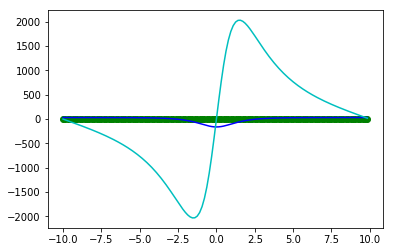

In [314]:
L = 20 #define computational domain
n = 128 #define the number of fourier modes

x2 = np.linspace(-L/2, L/2, n+1) #define the domain discritization
x = x2[0:n] #consider only the first n points: periodic

u = 1 / np.cosh(x) #function to take derivative
ut = np.fft.fft(u) #FFT the function


k = (2*np.pi/L)*np.append(np.arange(0,(n/2),1),np.arange(-1,((-n-1)/2),-1)) #k rescale to 2pi domain

ut1 = 1j*k*ut #take first dericative
ut2 = -k**2*ut #take second derivative
ut3 = -1j*k**3*ut #take third derivative

u1=np.fft.ifft(ut1) #inver transform
u2=np.fft.ifft(ut2) #inver transform
u3=np.fft.ifft(ut3) #inver transform

u1exact=-(1/np.cosh(x))*np.tanh(x)

utshift = np.fft.fftshift(ut) #shift FFT

plt.figure(1), plt.plot(x,u,'r',x,u1,'g',x,u1exact,'go',x,u2,'b',x,u3,'c')

In [308]:
len(k)

128

In [312]:
np.arange(-1((-n-1)/2),-1)

array([], dtype=float64)